Christian Basso, Adam Zawistowski, Eleazar Miranda

Program 4: Benchmarking Heaps

CSC 3310

March 29th, 2024

# Program 4: Benchmarking Heaps

## Summary
This program aims to benchmark various functions from the heapq libary. The "heapify", "heappush", "heappop", and "heapreplace" functions will be tested against various input arrays to record their results to expected results. Additionally, each function will be benchmarked with best, worst, and average case arrays with sizes 10, 100, 1000, and 100000 to asess their theoretical run time against their actual benchmarked run time. Each heapq opperation will be analyzed with a log-linear regression model to predict its Big O time complexity.

## Benchmarking

*Note that heapq uses MIN heaps*

**For heappush:**
- The best case is when you add an element to a heap that is largrer than all other heap elements. This is because the element will be put at the end of the heap and will not need to be switched with any elements since it is garenteed to be larger than its parent. So, the best case heap will be made from numbers 1-99, and you will need to add the element "100" to the heap to test the best case.
- The worst case is adding an element that is smaller than all other heap elements. This is because the element will be put at the end of the heap and will need to be switched with every other element "in its path" to the root (old smallest element). So, the worst case heap will be made from numbers 2-100, and you will need to add the element "1" to the heap to test the worst case.
- The average case will be adding the element "50" to the heap of random numbers 1-100.

**For heappop:**
- All cases are the same since you are removing an element from the same spot no matter what the heap looks like. So, use the same benchmark heaps as the heappush function.

**For heapify**
- The best case will be an array that is already in heap form. So, use the heapify function on an array then use the heapify function on the same array.
- The worst case would be an array in reversed sorted order (n to 1) since each of the elements near the end of the array would be small need to be moved up the heap and the heap would get a new root every itteration since each element in the input array is smaller than each of the previous elements.
- The average case will be an array of random numbers 1-100.

**For heapreplace**
- Since heapreplace is just popping then pushing an element, the best, worst, and average case will be a combination of both pop and push. However, since heappop cases are all the same, the best, worst, and average case for heapreplace will be the same as heappush.

Each of these cases will be made with a seperate function.

### Functions for making benchmarking lists

In [398]:
import heapq
import pandas as pd

In [399]:
import random
import random
def random_list(n, min_val, max_val):
    return random.choices(range(min_val, max_val+1), k=n)
    

In [400]:
def create_push_pop_list(case, n):
    if case == "best":
        arr = random_list(n, 1, 99)
        heapq.heapify(arr)
        return arr
    elif case == "worst":
        arr = random_list(n, 2, 100)
        heapq.heapify(arr)
        return arr
    elif case == "avg" or case == "average":
            arr = random_list(n, 1, 100)
            heapq.heapify(arr)
            return arr
    else:
        print("Not valid, youre dumb")
        return -1

In [401]:
def create_heapify_list(case, n):
    if case == "best":
        arr = random_list(n, 1, 100)
        heapq.heapify(arr)
        return arr
    elif case == "worst":
        arr = random_list(n, 1, 100)
        arr.sort(reverse = False)
        return arr
    elif case == "avg" or case == "average":
        return random_list(n, 1, 100)
    else:
        print("Not valid, youre dumb")
        return -1

### Creating Benchmarking Lists

#### Push

In [402]:
push_worst_10 = create_push_pop_list("worst", 10)
push_worst_100 = create_push_pop_list("worst", 100)
push_worst_1000 = create_push_pop_list("worst", 1000)
push_worst_10000 = create_push_pop_list("worst", 10000)
push_worst_100000 = create_push_pop_list("worst", 100000)
push_worst_500000 = create_push_pop_list("worst", 500000)

push_best_10 = create_push_pop_list("best", 10)
push_best_100 = create_push_pop_list("best", 100)
push_best_1000 = create_push_pop_list("best", 1000)
push_best_10000 = create_push_pop_list("best", 10000)
push_best_100000 = create_push_pop_list("best", 100000)
push_best_500000 = create_push_pop_list("best", 500000)

push_avg_10 = create_push_pop_list("avg", 10)
push_avg_100 = create_push_pop_list("avg", 100)
push_avg_1000 = create_push_pop_list("avg", 1000)
push_avg_10000 = create_push_pop_list("avg", 10000)
push_avg_100000 = create_push_pop_list("avg", 100000)
push_avg_500000 = create_push_pop_list("avg", 500000)

#### Pop

In [403]:
pop_worst_10 = create_push_pop_list("worst", 10)
pop_worst_100 = create_push_pop_list("worst", 100)
pop_worst_1000 = create_push_pop_list("worst", 1000)
pop_worst_10000 = create_push_pop_list("worst", 10000)
pop_worst_100000 = create_push_pop_list("worst", 100000)
pop_worst_500000 = create_push_pop_list("worst", 500000)

pop_best_10 = create_push_pop_list("best", 10)
pop_best_100 = create_push_pop_list("best", 100)
pop_best_1000 = create_push_pop_list("best", 1000)
pop_best_10000 = create_push_pop_list("best", 10000)
pop_best_100000 = create_push_pop_list("best", 100000)
pop_best_500000 = create_push_pop_list("best", 500000)

pop_avg_10 = create_push_pop_list("avg", 10)
pop_avg_100 = create_push_pop_list("avg", 100)
pop_avg_1000 = create_push_pop_list("avg", 1000)
pop_avg_10000 = create_push_pop_list("avg", 10000)
pop_avg_100000 = create_push_pop_list("avg", 100000)
pop_avg_500000 = create_push_pop_list("avg", 500000)


#### Heapify

In [404]:
heapify_worst_10 = create_heapify_list("worst", 10)
heapify_worst_100 = create_heapify_list("worst", 100)
heapify_worst_1000 = create_heapify_list("worst", 1000)
heapify_worst_10000 = create_heapify_list("worst", 10000)
heapify_worst_100000 = create_heapify_list("worst", 100000)
heapify_worst_500000 = create_heapify_list("worst", 500000)

heapify_best_10 = create_heapify_list("best", 10)
heapify_best_100 = create_heapify_list("best", 100)
heapify_best_1000 = create_heapify_list("best", 1000)
heapify_best_10000 = create_heapify_list("best", 10000)
heapify_best_100000 = create_heapify_list("best", 100000)
heapify_best_500000 = create_heapify_list("best", 500000)

heapify_avg_10 = create_heapify_list("avg", 10)
heapify_avg_100 = create_heapify_list("avg", 100)
heapify_avg_1000 = create_heapify_list("avg", 1000)
heapify_avg_10000 = create_heapify_list("avg", 10000)
heapify_avg_100000 = create_heapify_list("avg", 100000)
heapify_avg_500000 = create_heapify_list("avg", 500000)

#### Heapreplace

In [405]:
rp_worst_10 = create_push_pop_list("worst", 10)
rp_worst_100 = create_push_pop_list("worst", 100)
rp_worst_1000 = create_push_pop_list("worst", 1000)
rp_worst_10000 = create_push_pop_list("worst", 10000)
rp_worst_100000 = create_push_pop_list("worst", 100000)
rp_worst_500000 = create_push_pop_list("worst", 500000)

rp_best_10 = create_push_pop_list("best", 10)
rp_best_100 = create_push_pop_list("best", 100)
rp_best_1000 = create_push_pop_list("best", 1000)
rp_best_10000 = create_push_pop_list("best", 10000)
rp_best_100000 = create_push_pop_list("best", 100000)
rp_best_500000 = create_push_pop_list("best", 500000)

rp_avg_10 = create_push_pop_list("avg", 10)
rp_avg_100 = create_push_pop_list("avg", 100)
rp_avg_1000 = create_push_pop_list("avg", 1000)
rp_avg_10000 = create_push_pop_list("avg", 10000)
rp_avg_100000 = create_push_pop_list("avg", 100000)
rp_avg_500000 = create_push_pop_list("avg", 500000)

In [ ]:
pop_worst_10000 = create_push_pop_list("worst", 10000)

hr_best_10 = create_push_pop_list("best", 10)
hr_best_100 = create_push_pop_list("best", 100)
hr_best_1000 = create_push_pop_list("best", 1000)
hr_best_10000 = create_push_pop_list("best", 10000)

hr_avg_10 = create_push_pop_list("avg", 10)
hr_avg_100 = create_push_pop_list("avg", 100)
hr_avg_1000 = create_push_pop_list("avg", 1000)
hr_avg_10000 = create_push_pop_list("avg", 10000)

### Benchmark Function

In [406]:
import copy
import time

In [407]:
def benchmark_push(algorithm, heap, input):
    copy_heap = copy.copy(heap)
    start_time = time.perf_counter()
    algorithm(copy_heap, input)
    end_time = time.perf_counter()
    return end_time - start_time

In [408]:
def benchmark_pop(algorithm, heap):
    copy_heap = copy.copy(heap)
    start_time = time.perf_counter()
    algorithm(copy_heap)
    end_time = time.perf_counter()
    return end_time - start_time

In [409]:
def benchmark_heapify(algorithm, array):
    copy_array = copy.copy(array)
    start_time = time.perf_counter()
    algorithm(copy_array)
    end_time = time.perf_counter()
    return end_time - start_time

In [410]:
def benchmark_rp(algorithm, heap, input):
    copy_heap = copy.copy(heap)
    start_time = time.perf_counter()
    algorithm(copy_heap, input)
    end_time = time.perf_counter()
    return end_time - start_time

### Performing Benchmarking

#### Push

In [421]:
print(push_best_100)    

[3, 6, 9, 6, 8, 10, 13, 15, 7, 11, 21, 10, 17, 36, 18, 29, 40, 22, 10, 15, 14, 22, 24, 10, 17, 27, 43, 44, 41, 71, 40, 31, 31, 67, 61, 50, 32, 33, 43, 46, 67, 30, 60, 32, 50, 32, 29, 21, 19, 21, 83, 84, 49, 60, 77, 51, 86, 92, 49, 91, 87, 77, 64, 87, 81, 57, 97, 99, 69, 61, 97, 54, 85, 64, 56, 36, 93, 52, 73, 60, 99, 78, 83, 69, 98, 95, 73, 90, 90, 90, 60, 57, 99, 41, 31, 47, 35, 47, 30, 35]


In [411]:
push_worst = []
push_best = []
push_avg = []

print("Push worst case:")

t = benchmark_push(heapq.heappush, push_worst_10, 1)
push_worst.append(t)
print("10 Elements: ", t)

t = benchmark_push(heapq.heappush, push_worst_100, 1)
push_worst.append(t)
print("100 Elements: ", t)

t = benchmark_push(heapq.heappush, push_worst_1000, 1)
push_worst.append(t)
print("1000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_worst_10000, 1)
push_worst.append(t)
print("10000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_worst_100000, 1)
push_worst.append(t)
print("100000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_worst_500000, 1)
push_worst.append(t)
print("500000 Elements: ", t)

print()

print("Push best case:")

t = benchmark_push(heapq.heappush, push_best_10, 100)
push_best.append(t)
print("10 Elements: ", t)

t = benchmark_push(heapq.heappush, push_best_100, 100)
push_best.append(t)
print("100 Elements: ", t)

t = benchmark_push(heapq.heappush, push_best_1000, 100)
push_best.append(t)
print("1000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_best_10000, 100)
push_best.append(t)
print("10000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_best_100000, 100)
push_best.append(t)
print("100000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_best_500000, 100)
push_best.append(t)
print("500000 Elements: ", t)

print()

print("Push avg case:")

t = benchmark_push(heapq.heappush, push_avg_10, random.randint(1, 100))
push_avg.append(t)
print("10 Elements: ", t)

t = benchmark_push(heapq.heappush, push_avg_100, random.randint(1, 100))
push_avg.append(t)
print("100 Elements: ", t)

t = benchmark_push(heapq.heappush, push_avg_1000, random.randint(1, 100))
push_avg.append(t)
print("1000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_avg_10000, random.randint(1, 100))
push_avg.append(t)
print("10000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_avg_100000, random.randint(1, 100))
push_avg.append(t)
print("100000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_avg_500000, random.randint(1, 100))
push_avg.append(t)
print("500000 Elements: ", t)


Push worst case:
10 Elements:  8.00006091594696e-07
100 Elements:  6.00004568696022e-06
1000 Elements:  2.00001522898674e-06
10000 Elements:  2.529995981603861e-05
100000 Elements:  0.0002506000455468893
500000 Elements:  0.0015756000066176057

Push best case:
10 Elements:  1.00000761449337e-06
100 Elements:  2.200016751885414e-06
1000 Elements:  2.200016751885414e-06
10000 Elements:  2.8399983420968056e-05
100000 Elements:  0.00025200005620718
500000 Elements:  0.001371599966660142

Push avg case:
10 Elements:  5.00003807246685e-07
100 Elements:  9.00006853044033e-07
1000 Elements:  1.600012183189392e-06
10000 Elements:  8.100061677396297e-06
100000 Elements:  0.00021970004308968782
500000 Elements:  0.0014778999611735344


#### Pop

In [412]:
pop_worst = []
pop_best = []
pop_avg = []

print("Pop worst case:")

t = benchmark_pop(heapq.heappop, pop_worst_10)
pop_worst.append(t)
print("10 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_worst_100)
pop_worst.append(t)
print("100 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_worst_1000)
pop_worst.append(t)
print("1000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_worst_10000)
pop_worst.append(t)
print("10000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_worst_100000)
pop_worst.append(t)
print("100000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_worst_500000)
pop_worst.append(t)
print("500000 Elements: ", t)

print()

print("Pop best case:")

t = benchmark_pop(heapq.heappop, pop_best_10)
pop_best.append(t)
print("10 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_best_100)
pop_best.append(t)
print("100 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_best_1000)
pop_best.append(t)
print("1000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_best_10000,)
pop_best.append(t)
print("10000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_best_100000,)
pop_best.append(t)
print("100000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_best_500000)
pop_best.append(t)
print("500000 Elements: ", t)


print()

print("Pop avg case:")

t = benchmark_pop(heapq.heappop, pop_avg_10)
pop_avg.append(t)
print("10 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_avg_100)
pop_avg.append(t)
print("100 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_avg_1000)
pop_avg.append(t)
print("1000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_avg_10000)
pop_avg.append(t)
print("10000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_avg_100000)
pop_avg.append(t)
print("100000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_avg_500000)
pop_avg.append(t)
print("500000 Elements: ", t)


Pop worst case:
10 Elements:  8.00006091594696e-07
100 Elements:  5.00003807246685e-07
1000 Elements:  5.00003807246685e-07
10000 Elements:  4.00003045797348e-07
100000 Elements:  9.00006853044033e-07
500000 Elements:  2.700020559132099e-06

Pop best case:
10 Elements:  8.00006091594696e-07
100 Elements:  6.00004568696022e-07
1000 Elements:  6.00004568696022e-07
10000 Elements:  5.00003807246685e-07
100000 Elements:  8.00006091594696e-07
500000 Elements:  1.3998942449688911e-06

Pop avg case:
10 Elements:  3.00002284348011e-07
100 Elements:  2.00001522898674e-07
1000 Elements:  3.00002284348011e-07
10000 Elements:  4.00003045797348e-07
100000 Elements:  7.00005330145359e-07
500000 Elements:  1.200009137392044e-06


#### Heapify

In [413]:
heapify_worst = []
heapify_best = []
heapify_avg = []

print("Heapify worst case:")

t = benchmark_heapify(heapq.heapify, heapify_worst_10)
heapify_worst.append(t)
print("10 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_worst_100)
heapify_worst.append(t)
print("100 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_worst_1000)
heapify_worst.append(t)
print("1000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_worst_10000)
heapify_worst.append(t)
print("10000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_worst_100000)
heapify_worst.append(t)
print("100000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_worst_500000)
heapify_worst.append(t)
print("500000 Elements: ", t)

print()

print("Heapify best case:")

t = benchmark_heapify(heapq.heapify, heapify_best_10)
heapify_best.append(t)
print("10 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_best_100)
heapify_best.append(t)
print("100 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_best_1000)
heapify_best.append(t)
print("1000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_best_10000)
heapify_best.append(t)
print("10000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_best_100000)
heapify_best.append(t)
print("100000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_best_500000)
heapify_best.append(t)
print("500000 Elements: ", t)

print()

print("Heapify avg case:")

t = benchmark_heapify(heapq.heapify, heapify_avg_10)
heapify_avg.append(t)
print("10 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_avg_100)
heapify_avg.append(t)
print("100 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_avg_1000)
heapify_avg.append(t)
print("1000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_avg_10000)
heapify_avg.append(t)
print("10000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_avg_100000)
heapify_avg.append(t)
print("100000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_avg_500000)
heapify_avg.append(t)
print("500000 Elements: ", t)

Heapify worst case:
10 Elements:  1.200009137392044e-06
100 Elements:  2.599903382360935e-06
1000 Elements:  1.750001683831215e-05
10000 Elements:  0.00016280007548630238
100000 Elements:  0.001680699991993606
500000 Elements:  0.008039599983021617

Heapify best case:
10 Elements:  1.00000761449337e-06
100 Elements:  2.900022082030773e-06
1000 Elements:  2.3400061763823032e-05
10000 Elements:  0.00023250002413988113
100000 Elements:  0.0022327000042423606
500000 Elements:  0.011307999957352877

Heapify avg case:
10 Elements:  1.300009898841381e-06
100 Elements:  3.100023604929447e-06
1000 Elements:  2.4799956008791924e-05
10000 Elements:  0.00025559996720403433
100000 Elements:  0.0024612999986857176
500000 Elements:  0.012818400049582124


#### Heapreplace

In [414]:
rp_worst = []
rp_best = []
rp_avg = []

print("Replace worst case:")

t = benchmark_rp(heapq.heapreplace, rp_worst_10, 1)
rp_worst.append(t)
print("10 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_worst_100, 1)
rp_worst.append(t)
print("100 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_worst_1000, 1)
rp_worst.append(t)
print("1000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_worst_10000, 1)
rp_worst.append(t)
print("10000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_worst_100000, 1)
rp_worst.append(t)
print("100000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_worst_500000, 1)
rp_worst.append(t)
print("500000 Elements: ", t)

print()

print("Replace best case:")

t = benchmark_rp(heapq.heapreplace, rp_best_10, 100)
rp_best.append(t)
print("10 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_best_100, 100)
rp_best.append(t)
print("100 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_best_1000, 100)
rp_best.append(t)
print("1000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_best_10000, 100)
rp_best.append(t)
print("10000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_best_100000, 100)
rp_best.append(t)
print("100000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_best_500000, 100)
rp_best.append(t)
print("500000 Elements: ", t)

print()

print("Replace avg case:")

t = benchmark_rp(heapq.heapreplace, rp_avg_10, random.randint(1, 100))
rp_avg.append(t)
print("10 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_avg_100, random.randint(1, 100))
rp_avg.append(t)
print("100 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_avg_1000, random.randint(1, 100))
rp_avg.append(t)
print("1000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_avg_10000, random.randint(1, 100))
rp_avg.append(t)
print("10000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_avg_100000, random.randint(1, 100))
rp_avg.append(t)
print("100000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_avg_500000, random.randint(1, 100))
rp_avg.append(t)
print("500000 Elements: ", t)

Replace worst case:
10 Elements:  6.00004568696022e-07
100 Elements:  5.00003807246685e-07
1000 Elements:  7.00005330145359e-07
10000 Elements:  4.998873919248581e-07
100000 Elements:  1.100008375942707e-06
500000 Elements:  2.600019797682762e-06

Replace best case:
10 Elements:  5.00003807246685e-07
100 Elements:  6.998889148235321e-07
1000 Elements:  4.00003045797348e-07
10000 Elements:  3.00002284348011e-07
100000 Elements:  6.00004568696022e-07
500000 Elements:  1.100008375942707e-06

Replace avg case:
10 Elements:  5.00003807246685e-07
100 Elements:  3.00002284348011e-07
1000 Elements:  3.00002284348011e-07
10000 Elements:  5.00003807246685e-07
100000 Elements:  1.300009898841381e-06
500000 Elements:  1.200009137392044e-06


# Benchmarking Results

## Heappush Benchmarking Results

In [415]:
df_push = pd.DataFrame(columns = ["10", "100", "1000", "10000", "100000", "500000"])
df_push.loc["Worst"] = push_worst
df_push.loc["Best"] = push_best
df_push.loc["Avg"] = push_avg
df_push.head()

,10,100,1000,10000,100000,500000
Worst,8.000061e-07,6.000046e-06,0.000002,0.000025,0.000251,0.001576
Best,1.000008e-06,2.200017e-06,0.000002,0.000028,0.000252,0.001372
Avg,5.000038e-07,9.000069e-07,0.000002,0.000008,0.000220,0.001478


## Heappop Benchmarking Results

In [416]:
df_pop = pd.DataFrame(columns = ["10", "100", "1000", "10000", "100000", "500000"])
df_pop.loc["Worst"] = pop_worst
df_pop.loc["Best"] = pop_best
df_pop.loc["Avg"] = pop_avg
df_pop.head()

,10,100,1000,10000,100000,500000
Worst,8.000061e-07,5.000038e-07,5.000038e-07,4.000030e-07,9.000069e-07,0.000003
Best,8.000061e-07,6.000046e-07,6.000046e-07,5.000038e-07,8.000061e-07,0.000001
Avg,3.000023e-07,2.000015e-07,3.000023e-07,4.000030e-07,7.000053e-07,0.000001


## Heapify Benchmarking Results

In [417]:
df_heapify = pd.DataFrame(columns = ["10", "100", "1000", "10000", "100000", "500000"])
df_heapify.loc["Worst"] = heapify_worst
df_heapify.loc["Best"] = heapify_best
df_heapify.loc["Avg"] = heapify_avg
df_heapify.head()

,10,100,1000,10000,100000,500000
Worst,0.000001,0.000003,0.000018,0.000163,0.001681,0.008040
Best,0.000001,0.000003,0.000023,0.000233,0.002233,0.011308
Avg,0.000001,0.000003,0.000025,0.000256,0.002461,0.012818


## Heapreplace Benchmarking Results

In [418]:
df_rp = pd.DataFrame(columns = ["10", "100", "1000", "10000", "10000", "500000"])
df_rp.loc["Worst"] = rp_worst
df_rp.loc["Best"] = rp_best
df_rp.loc["Avg"] = rp_avg
df_rp.head()

,10,100,1000,10000,10000,500000
Worst,6.000046e-07,5.000038e-07,7.000053e-07,4.998874e-07,1.100008e-06,0.000003
Best,5.000038e-07,6.998889e-07,4.000030e-07,3.000023e-07,6.000046e-07,0.000001
Avg,5.000038e-07,3.000023e-07,3.000023e-07,5.000038e-07,1.300010e-06,0.000001


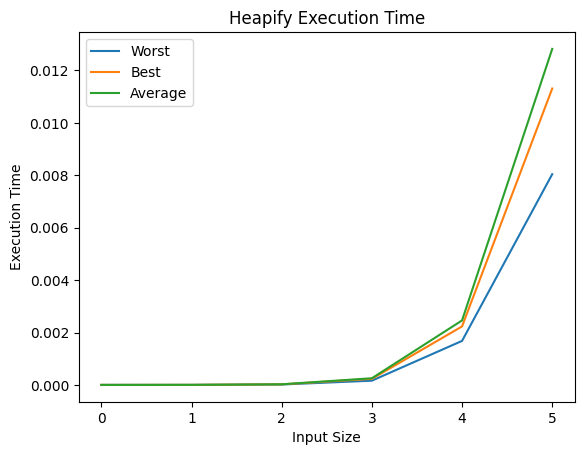

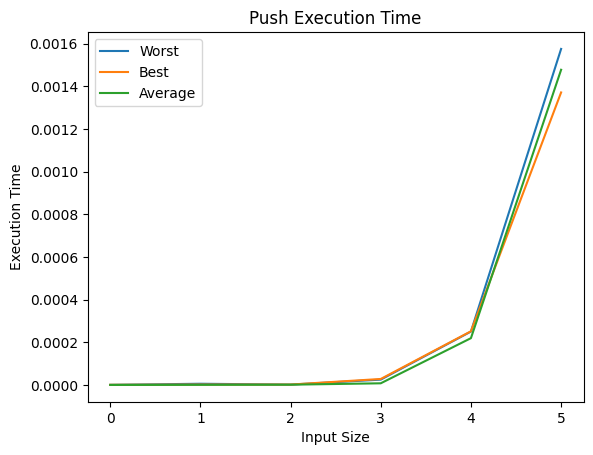

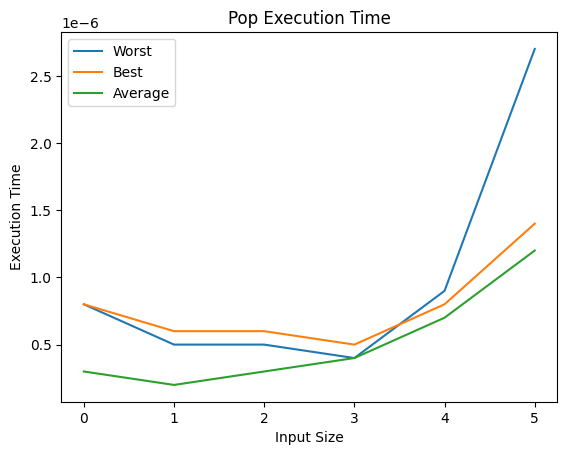

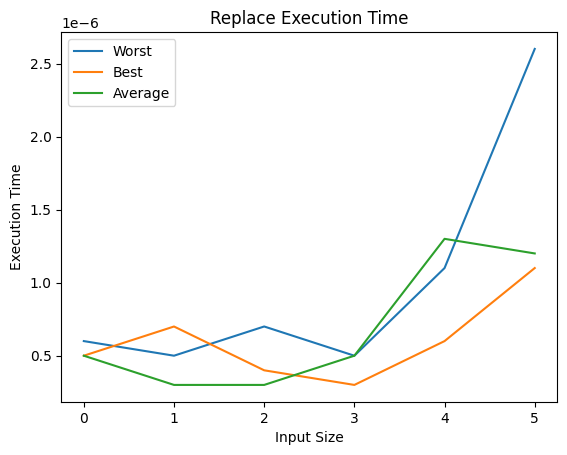

In [419]:
import matplotlib.pyplot as plt

# Plotting heapify_worst, heapify_best, and heapify_avg
#x_axis = [10, 100, 1000, 10000, 100000, 500000]
plt.plot( heapify_worst, label='Worst')
plt.plot( heapify_best, label='Best')
plt.plot( heapify_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Heapify Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Plotting heapify_worst, heapify_best, and heapify_avg
plt.plot(push_worst, label='Worst')
plt.plot(push_best, label='Best')
plt.plot(push_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Push Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Plotting heapify_worst, heapify_best, and heapify_avg
plt.plot(pop_worst, label='Worst')
plt.plot( pop_best, label='Best')
plt.plot(pop_avg, label='Average')
# Adding labels nd title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Pop Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Plotting heapify_worst, heapify_best, and heapify_avg
plt.plot(rp_worst, label='Worst')
plt.plot(rp_best, label='Best')
plt.plot(rp_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Replace Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()



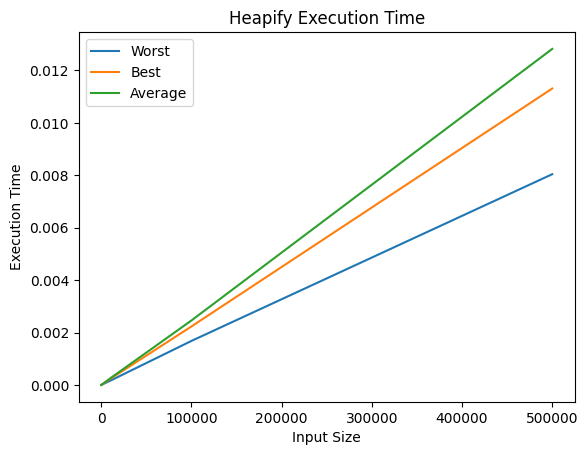

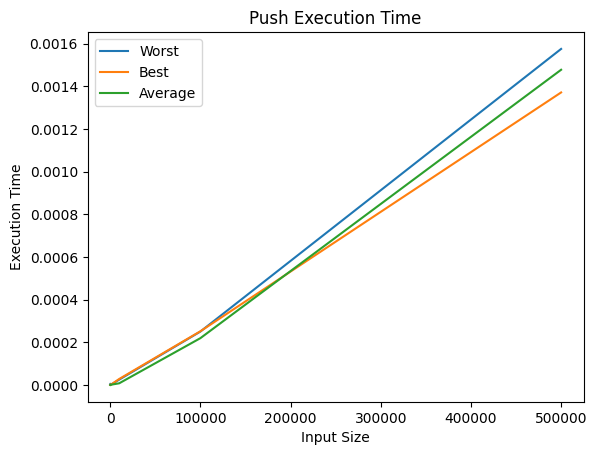

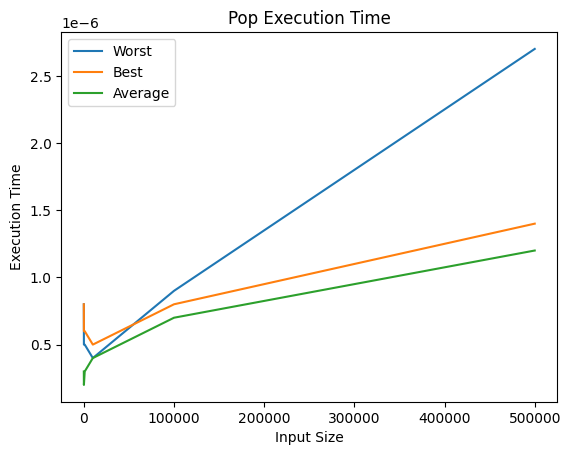

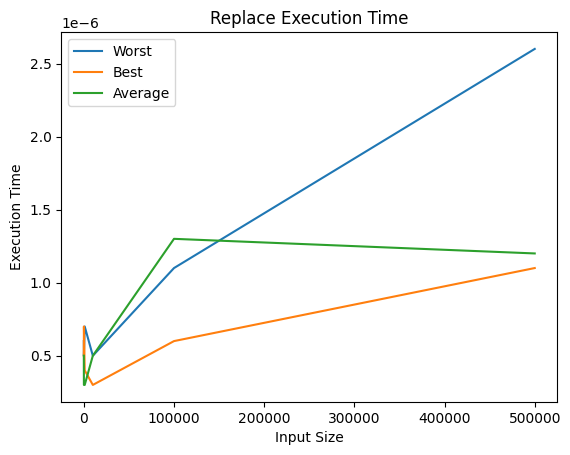

In [420]:
import matplotlib.pyplot as plt

# Plotting heapify_worst, heapify_best, and heapify_avg
x_axis = [10, 100, 1000, 10000, 100000, 500000]
plt.plot(x_axis, heapify_worst, label='Worst')
plt.plot(x_axis, heapify_best, label='Best')
plt.plot(x_axis, heapify_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Heapify Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Plotting heapify_worst, heapify_best, and heapify_avg
plt.plot(x_axis, push_worst, label='Worst')
plt.plot(x_axis, push_best, label='Best')
plt.plot(x_axis, push_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Push Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Plotting heapify_worst, heapify_best, and heapify_avg
plt.plot(x_axis, pop_worst, label='Worst')
plt.plot(x_axis, pop_best, label='Best')
plt.plot(x_axis, pop_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Pop Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Plotting heapify_worst, heapify_best, and heapify_avg
plt.plot(x_axis, rp_worst, label='Worst')
plt.plot(x_axis, rp_best, label='Best')
plt.plot(x_axis, rp_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Replace Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()




## Regressional Time Complexity Analysis

an analysis using the regression techniques from the second homework to estimate the big-O time complexity for each
heapq operation based on the benchmarking results

In [ ]:
import numpy as np
from scipy.stats import linregress
def lineReg(listsizes, runtimes):
    m, b, -, -, - = linregress(np.log(listsizes),np.log(runtimes))
    print('Slope for list size')